<a href="https://colab.research.google.com/github/oleaskeland/AdvancedAutomation/blob/CA1/Assignment_1_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avanced Automation - Assignment 1

To be delivered until 2023-12-10 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

In this case the cubic model will overfit the training data picking up noise and capturing it with quadratic or cubic trends. Therefore it can actually fit the training data very well, but will not be able to generalize as well as the linear model. Conclusion: The RSS can be smaller for the cubic model.

**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

The testing RSS for the linear model is expected to be smaller than the cubic model. This is becuase the actual relationship between X and Y is linear so the cubic model is too complex and will overfit the data by picking up noise.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

**2.** Consider now the Palmer Archipelago penguin data. It consists of physical measurements of male and female adult penguins from three species that live in three different islands of the Palmer Archipelago in Antarctica.

**2.a)** Load the dataset `penguins_size.csv`.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/penguins_size.csv')

print(df.to_string())
print(len(df))

FileNotFoundError: ignored

**2.b)** Discard any row that has a missing value.

In [ ]:
df = df.dropna()

print(df.to_string())
print(len(df))

       species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen              39.1             18.7              181.0       3750.0    MALE
1       Adelie  Torgersen              39.5             17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen              40.3             18.0              195.0       3250.0  FEMALE
4       Adelie  Torgersen              36.7             19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen              39.3             20.6              190.0       3650.0    MALE
6       Adelie  Torgersen              38.9             17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen              39.2             19.6              195.0       4675.0    MALE
12      Adelie  Torgersen              41.1             17.6              182.0       3200.0  FEMALE
13      Adelie  Torgersen              38.6             21.2              191.0       3800.

**2.c)** How many penguins of each `species` and `sex` live in each `island`? Answer this question with `pandas`.

In [ ]:
result = df.groupby(['species', 'sex', 'island']).size().reset_index(name='count')

# Extract the numbers as a dictionary
result_dict = result.set_index(['species', 'sex', 'island'])['count'].to_dict()

# Display the result as a dictionary
print(result_dict)

{('Adelie', 'FEMALE', 'Biscoe'): 22, ('Adelie', 'FEMALE', 'Dream'): 27, ('Adelie', 'FEMALE', 'Torgersen'): 24, ('Adelie', 'MALE', 'Biscoe'): 22, ('Adelie', 'MALE', 'Dream'): 28, ('Adelie', 'MALE', 'Torgersen'): 23, ('Chinstrap', 'FEMALE', 'Dream'): 34, ('Chinstrap', 'MALE', 'Dream'): 34, ('Gentoo', 'FEMALE', 'Biscoe'): 58, ('Gentoo', 'MALE', 'Biscoe'): 61}


**2.d)** Plot a correlation matrix of the numerical columns (with a statistical significance of 0.1%).

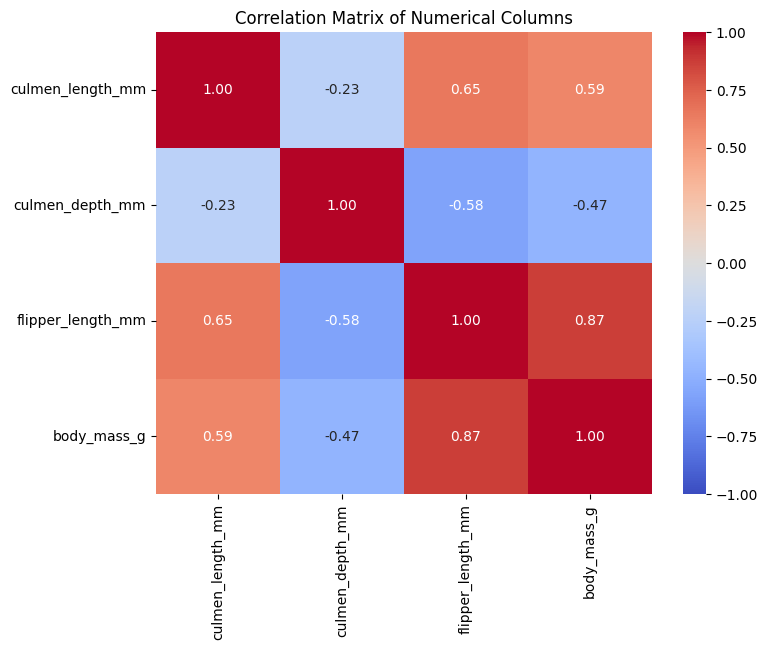

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Select only the numerical columns for correlation matrix
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

# Set the title of the plot
plt.title('Correlation Matrix of Numerical Columns')

# Show the plot
plt.show()

**2.e)** Perform a simple linear regression considering `body_mass_g` as the response and `flipper_length_mm` as the predictor. Print the obtained model and the $R^2$. Explain why this is a good choice of predictor.

In [ ]:
#Using flipper_length_mm as the predictor makes sense because it has the highest correlation with body_mass_g out of all the numerical columns.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import numpy as np

X = df.dropna()["flipper_length_mm"].to_numpy().reshape(-1,1)#flipper_length
y = df.dropna()["body_mass_g"].to_numpy() #body_mass_g



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

# Predicting on the test set
y_pred = reg.predict(X_test)

r2_simple = metrics.r2_score(y_test, y_pred)
print("R-squared:", r2_simple)

print("Intercept:", reg.intercept_)
print("Coefficient:", reg.coef_[0])

R-squared: 0.7938115564401114
Intercept: -5919.258741821233
Coefficient: 50.41798199462178


**2.f)** Plot a scatter plot of the response and predictor, along with the regression line.

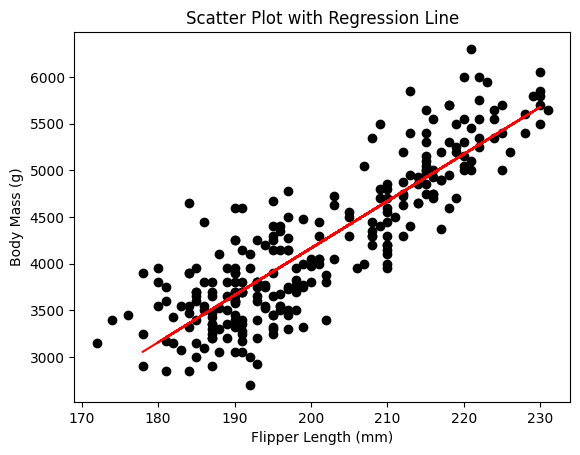

In [ ]:

plt.scatter(X_train,y_train, color='black')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot with Regression Line')
plt.show()

**2.g)** A baby penguin has a flipper length of around 50 mm. What is the predicted value of the body mass of a baby penguin? Comment on the prediction of the model.

In [ ]:
import numpy as np

sample = np.array([50]).reshape(-1,1)

prediction = reg.predict(sample)

print(prediction)

#The model is extrapolating beyond the range of the training data.
#It has not been trained on baby penguins which means it will continue the linear trend which gives predictions that does not make sense.


[-3398.35964209]


**2.h)** Perform a multiple linear regression considering `body_mass_g` as the response and using all numerical predictors. Compare the $R^2$ of the simple linear regression model and the multiple linear regression model.

In [ ]:

X = df.dropna()[numerical_columns].drop("body_mass_g", axis=1).to_numpy()#Numerical predictors except bodymass_g
y = df.dropna()["body_mass_g"].to_numpy() #body_mass_g

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_multi = LinearRegression().fit(X_train, y_train)

# Predicting on the test set
y_pred_multi = reg_multi.predict(X_test)

r2_multi = metrics.r2_score(y_test, y_pred_multi)
print("R-squared:", r2_multi)

print("Intercept:", reg_multi.intercept_)
print("Coefficient:", reg_multi.coef_[0])

print(f"R2 for simple: {r2_simple}, R2 for multi: {r2_multi}")



R-squared: 0.7980758349105356
Intercept: -6227.68841061579
Coefficient: 3.85768347240655
R2 for simple: 0.7938115564401114, R2 for multi: 0.7980758349105356


**2.g)** Perform a multiple  linear regression considering `body_mass_g` as the response and using all predictors. Comment on the $R^2$ of this model.

In [ ]:
#One-hot encoding , get one column for each non-numerical columns; species, sex, island.
df_encoded = pd.get_dummies(df.dropna(), columns=['species', 'sex', 'island'], drop_first=True)

X = df_encoded.drop("body_mass_g", axis=1).to_numpy()
y = df.dropna()["body_mass_g"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_multi = LinearRegression().fit(X_train, y_train)

# Predicting on the test set
y_pred_multi = reg_multi.predict(X_test)

r2_multi = metrics.r2_score(y_test, y_pred_multi)
print("R-squared:", r2_multi)

print("Intercept:", reg_multi.intercept_)
print("Coefficient:", reg_multi.coef_[0])







R-squared: 0.8961688345769453
Intercept: -1294.6775785475047
Coefficient: 17.14973198319305


## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

It depends on how we want the model to behave. In the logisitic regression case we will wrongly classify 30% of unseen data. This is a known fact. In the 1-nearest neighbors case we do not know how the model performs on unseen data. It could be very overfitted to the training which will give a very low error rate, and perform very bad on test data. This can still produce a low error rate on average and mask its true generalization ability. So when classifying new unseen data the preferred method should be the Logistic Regression since we know its error rate and can take that into account when interpreting the results.

**4.a)** Consider again the penguins dataset. However, the objective now is to predict the `sex` of the penguin based on the other variables. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = pd.get_dummies(df.dropna(), columns=['species','island'], drop_first=True)

X = df_encoded.drop("sex", axis=1).to_numpy()
y = le.fit_transform(df.dropna()['sex']) #Encode sex to binary 0,1 so it can be used later in ROC curve



print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Test size = 30%





[1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1]


**4.b)** Perform LDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

test_error = 1 - accuracy_score(y_test, y_pred)

print(test_error)




0.08999999999999997


**4.c)** Perform QDA on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

test_error = 1 - accuracy_score(y_test, y_pred)

print(test_error)

0.12


**4.d)** Perform logistic regression on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

test_error = 1 - accuracy_score(y_test, y_pred)

print(test_error)

0.15000000000000002


**4.e)** Perform naive Bayes on the training data in order to predict `sex` using the remaining variables. What is the test error of the model obtained?

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

test_error = 1 - accuracy_score(y_test,y_pred)

print(test_error)

0.36


**4.f)** Perform KNN on the training data, with several values of K, in order to predict `sex`. What test errors are obtained? Which value of K seems to perform the best on this data set?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
test_errors = {}

for k in k_values:
  knc = KNeighborsClassifier(n_neighbors=k)
  knc.fit(X_train, y_train)
  y_pred = knc.predict(X_test)
  test_errors[f"k_value:  {k}"] = round(1 - accuracy_score(y_test, y_pred),10)

print(test_errors)
best_k_value =min(test_errors, key=test_errors.get)
print(f"Lowest test_error: {best_k_value}")

{'k_value:  2': 0.22, 'k_value:  3': 0.18, 'k_value:  4': 0.17, 'k_value:  5': 0.16, 'k_value:  6': 0.16, 'k_value:  7': 0.16, 'k_value:  8': 0.16, 'k_value:  9': 0.14, 'k_value:  10': 0.17, 'k_value:  11': 0.16, 'k_value:  12': 0.14}
Lowest test_error: k_value:  9


**4.g)** Plot the ROC curve and calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

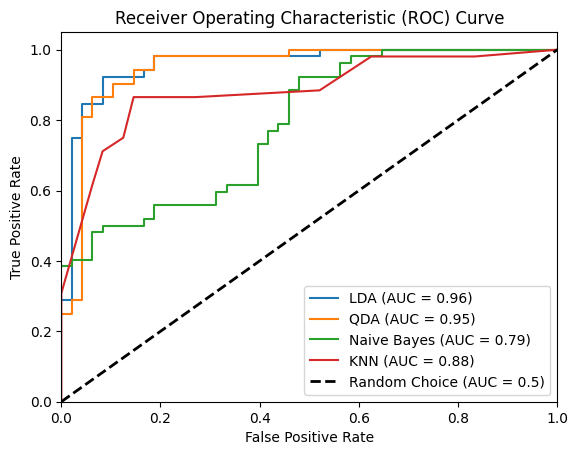

In [ ]:
from sklearn.metrics import roc_curve, auc
model_bank = {
    "LDA": lda,
    "QDA": qda,
    "Naive Bayes": gnb,
    "KNN": KNeighborsClassifier(n_neighbors=9).fit(X_train,y_train),
}
for model_name, model in model_bank.items():

    false_p_r, true_p_r, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1]) #Dont need the thresholds
    roc_auc = auc(false_p_r, true_p_r)
    plt.plot(false_p_r, true_p_r, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label = "Random Choice (AUC = 0.5)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()






In [ ]:

#All of the models perform better than random choice (the dotted line), however the LDA AND QDA performs the best with an AUC very close to 1.


## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how k-fold cross-validation is implemented.

We split the data into k folds, or subsets. We train and test/validate the model k times. For each iteration we pick a fold and use this as test set. The remaining folds are used as training set. The score from each iteration are combined to produce a total score for the model-training.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV).

1)
**Advantages:**
Less variance because the model is trained on multiple partitions not only one. With only one random partition there could be variance in the results.
**Disadvantages**
Can be more computionally expensive since its trained and tested multiple times. If the order of the data is crucial to recognizing patterns k-fold will not work well. For example data that is a series of time observations where there is conditional dependencies.

2)
**Advantages**
More computionally efficient since it involves fewer iterations than LOOCV.Especially on large data sets. LOOCV uses n iterations as each datapoint is used as a test, rather than k iterations in k-fold. K-fold is more robust and is less sensitive to noise because LOOCV estimates performance seperately for each data point.
**Disadvantages**^
In small datasets LOOCV may provide better performance.

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

**Advantages**
Having a venv provides more isolation and makes it easier to have tailored and ecapsulated dependencies relevant to the project. Its easier to share the work in an venv because the work is made with the correct dependecies and do not interfere with outside packages, so it can be reproduced on different machines.
**Disadvanteges**
It has a learning curve and can be hard to set up, also creating all the correct dependecies can be a struggle.

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

If we want to code alone, and not together Jupyter Notebook is better because we have more experience with it. Also the file management on jupyter notebook is easier to manage, so we can avoid runtime files that are deleted after runtime. Jupyter Notebook can be used in other IDES for example VSCODE. When you have no access to internet Jupyter Notebook is the clear winner as well. Google Colab is great when we are pair programming. Google Colab has most dependecies already installed it seems, and is running on Googles GPU/CPUS which is a advantage to us if our computer is bad, or if the work we are doing is very computaniolly hard.

**8)** Enter your GitHub repository webpage.

In [ ]:
#https://github.com/oleaskeland/AdvancedAutomation.git
